In [10]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory("C:\\Users\\Datta Sai\\Downloads\\ai_j_component\\Drowsiness detection\\eyes",batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator('data/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('data/valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


# img,labels= next(train_batch)
# print(img.shape)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),


    

    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),

    Dropout(0.5),

    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

model.save('models/cnnCat6.h5', overwrite=True)

Found 2423 images belonging to 2 classes.
Found 2423 images belonging to 2 classes.
75 75
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
75/75 [==============================] - 51s 678ms/step - loss: 0.5862 - accuracy: 0.6847 - val_loss: 0.4610 - val_accuracy: 0.7996
Epoch 2/15
75/75 [==============================] - 9s 122ms/step - loss: 0.4515 - accuracy: 0.7959 - val_loss: 0.3991 - val_accuracy: 0.8363
Epoch 3/15
75/75 [==============================] - 10s 127ms/step - loss: 0.3733 - accuracy: 0.8285 - val_loss: 0.2919 - val_accuracy: 0.8742
Epoch 4/15
75/75 [==============================] - 9s 125ms/step - loss: 0.3017 - accuracy: 0.8699 - val_loss: 0.2314 - val_accuracy: 0.9025
Epoch 5/15
75/75 [==============================] - 9s 119ms/step - loss: 0.2582 - accuracy: 0.8954 - val_loss: 0.2112 - val_accuracy: 0.9112
Epoch 6/15
75/75 [==============================] - 9s 125ms/step - loss: 0.2337 - accuracy: 0.9013 - val_loss: 0.1781 - v

No handles with labels found to put in legend.


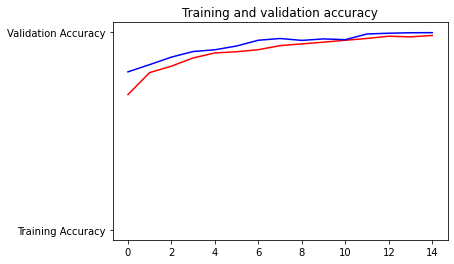

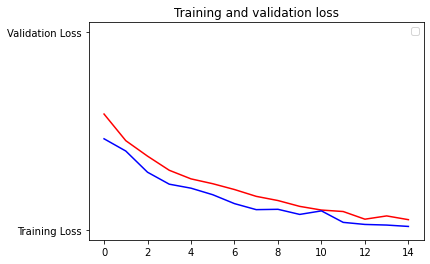

In [11]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()